Figure S4 (84 subfigures) from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the PSDs of 5 runs of the same sample through Mastersizer Laser Diffraction Particle Sizer (LDPS) PSD sensor for all samples (N=84). This figure is not presented in the paper, but the data stored on my local system.

Plot type: Line plot

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
############################################
### Step 1: Sample refining for plotting ###
############################################

df_bht = pd.read_csv(r'mastersizer_bht.csv')
df_bht = df_bht[(df_bht['Sample Name'].str[-2:] != 'r2') & (df_bht['Sample Name'].str[9:10] == 'D')]
df_bht = df_bht.loc[:,'0.1':'Sample Name']
df_bht.drop([col for col in df_bht.columns if 'Dx' in col], axis = 1, inplace = True)

df_ida = pd.read_csv(r'mastersizer_ida.csv')
df_ida = df_ida[(df_ida['Sample Name'].str[-2:] != 'r2') & (df_ida['Sample Name'].str[9:10] == 'D')]
df_ida = df_ida.loc[:,'0.1':'Sample Name']
df_ida.drop([col for col in df_ida.columns if 'Dx' in col], axis = 1, inplace = True)
                
df = pd.concat([df_bht, df_ida])

df = df.groupby('Sample Name', as_index = False).apply(lambda x : x.reset_index(drop = True)).droplevel(0)
df.index = df.index + 1
df.index = df['Sample Name'].str[5:8] + '_' + df.index.astype(str)
del df['Sample Name']
df = df.T

size = pd.Series(df.index).astype(float)

color_code = {1:'k',
              2:'r',
              3:'b',
              4:'g',
              5:'orange'}

sn_list = list(set([col[0:3] for col in df.columns]))
sn_list.sort() 

C:\Users\alima\AppData\Local\Temp/ipykernel_31492/1234829651.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


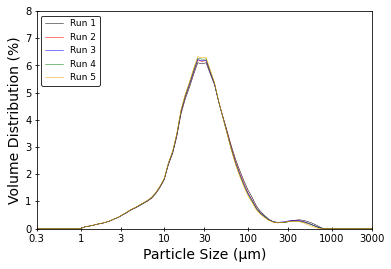

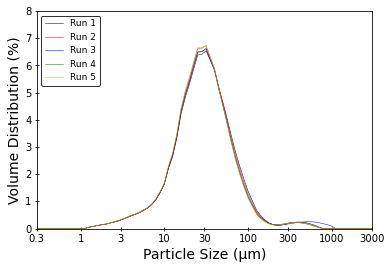

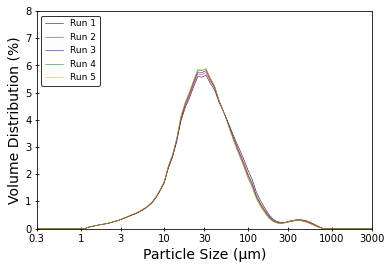

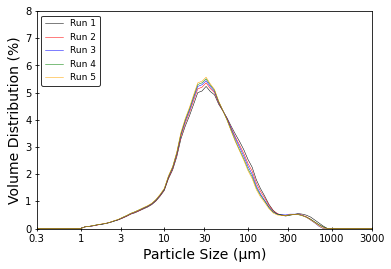

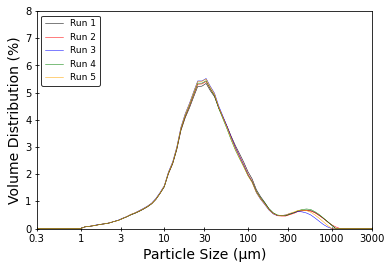

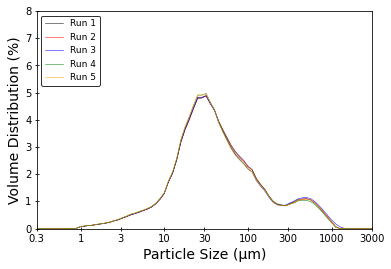

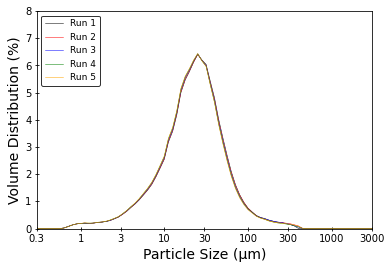

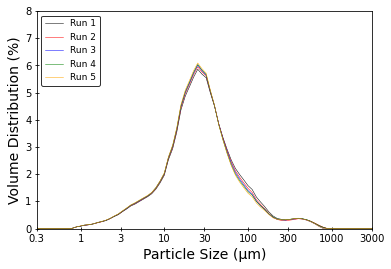

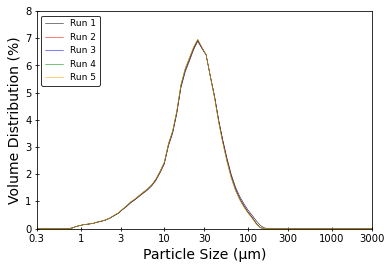

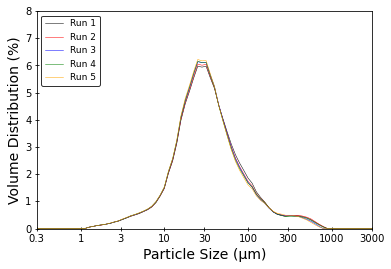

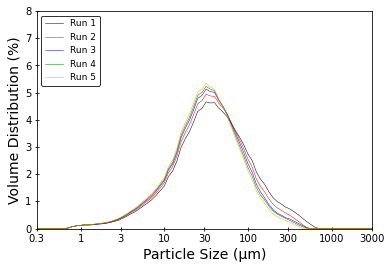

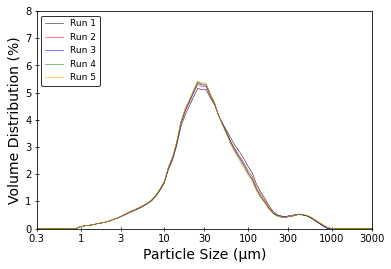

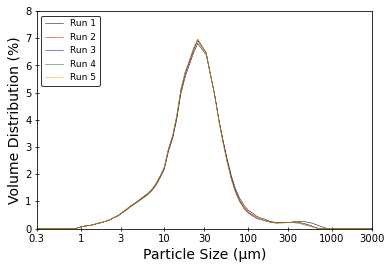

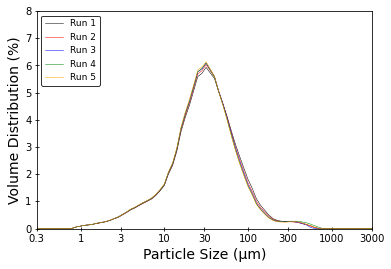

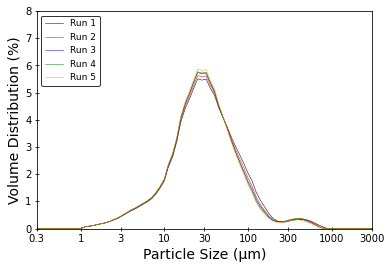

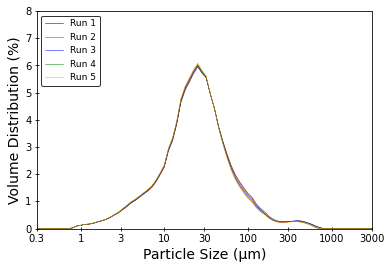

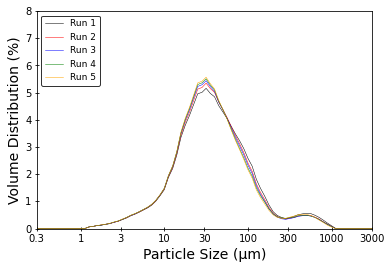

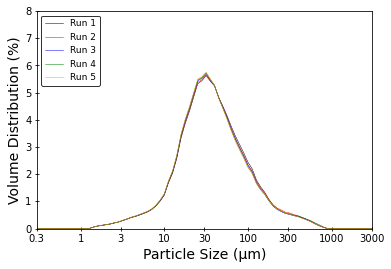

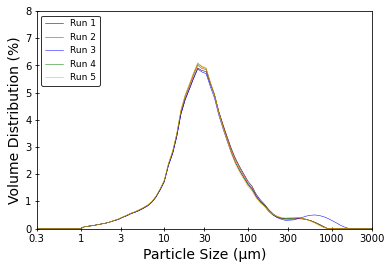

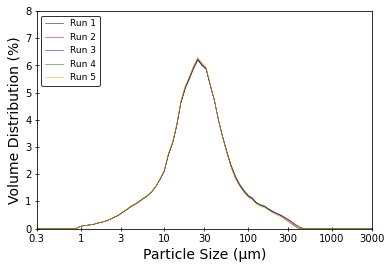

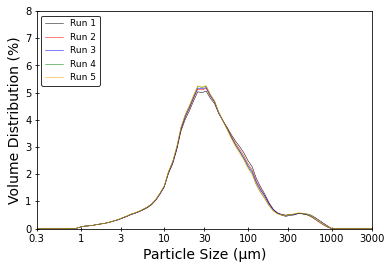

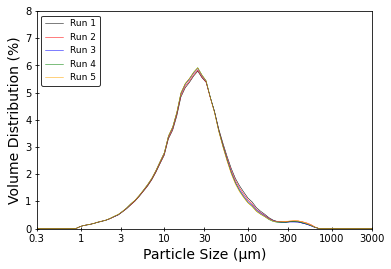

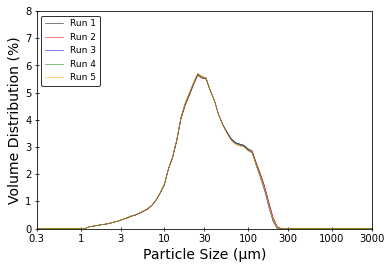

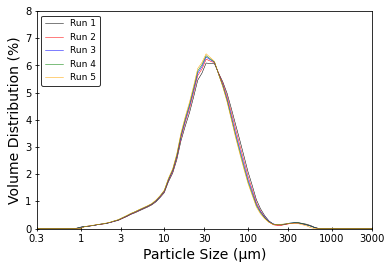

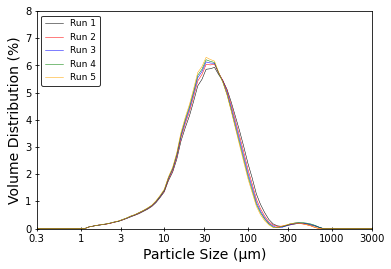

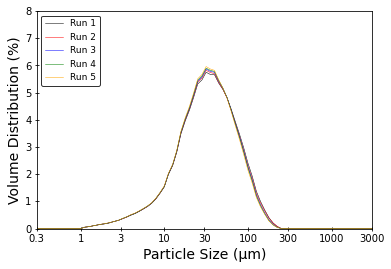

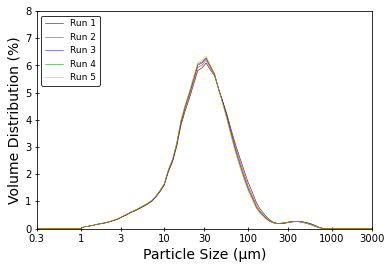

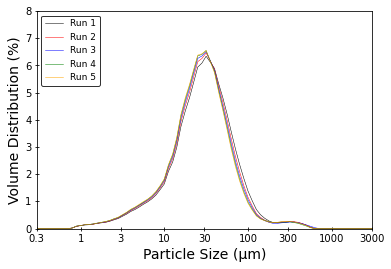

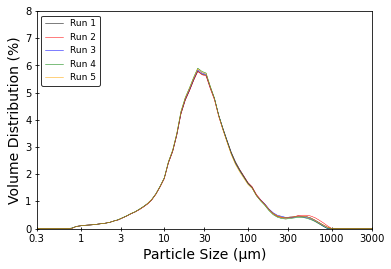

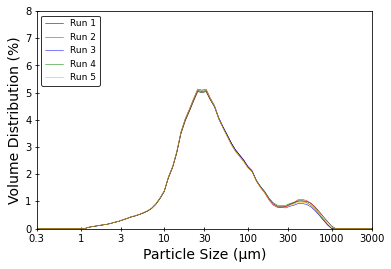

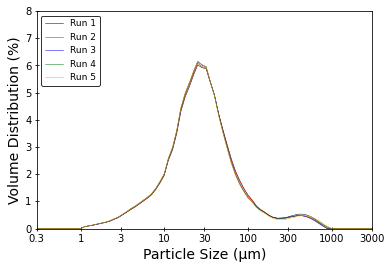

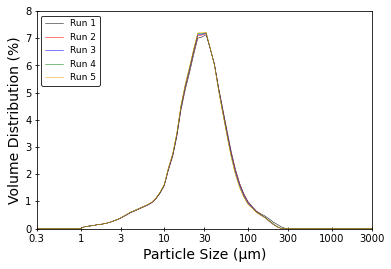

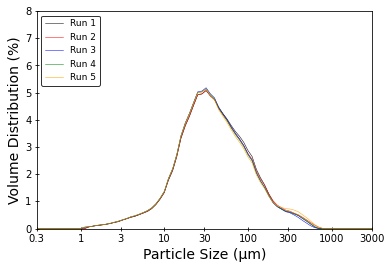

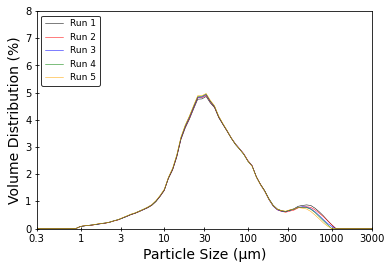

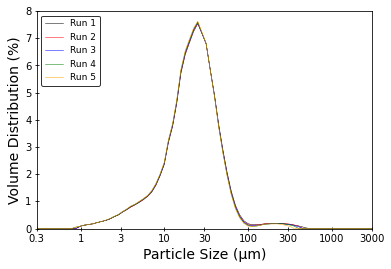

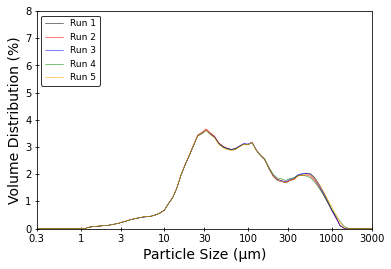

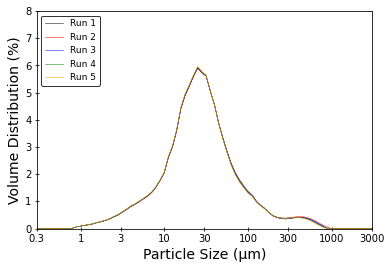

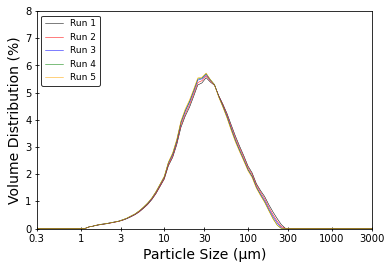

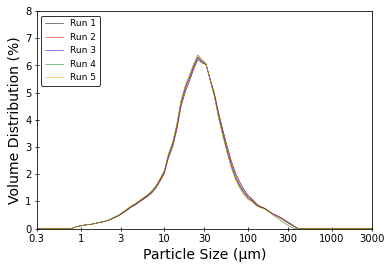

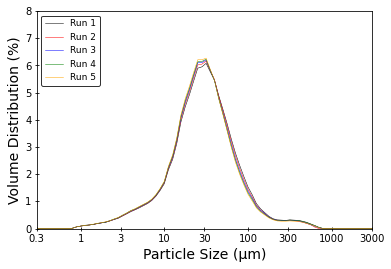

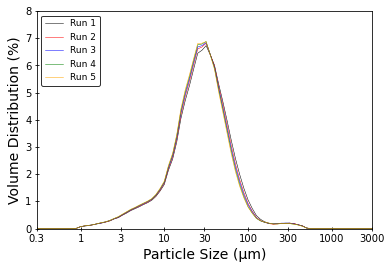

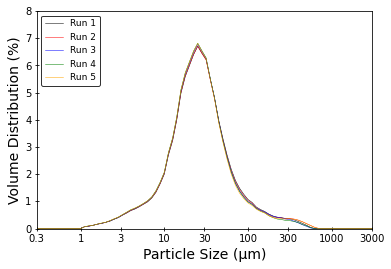

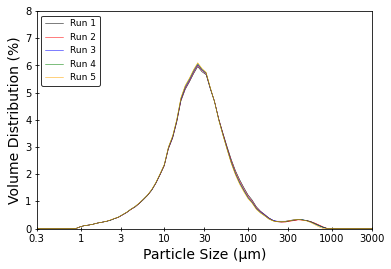

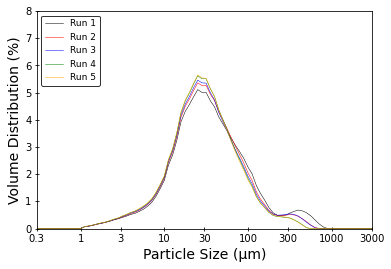

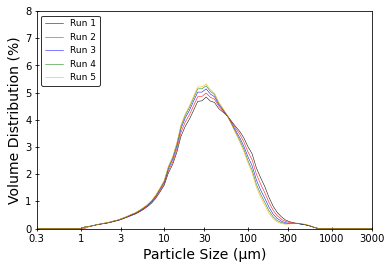

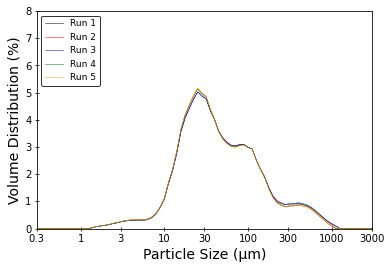

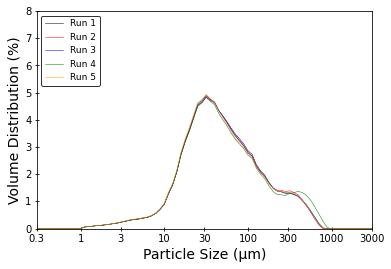

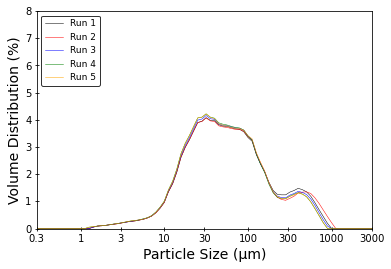

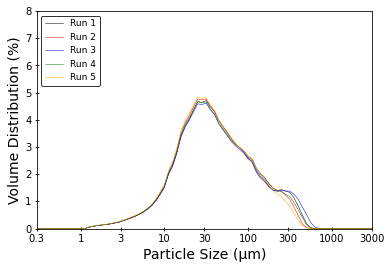

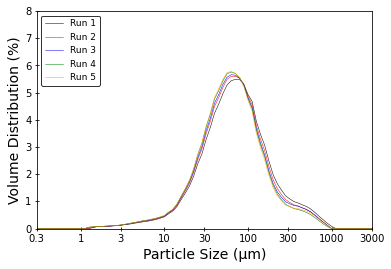

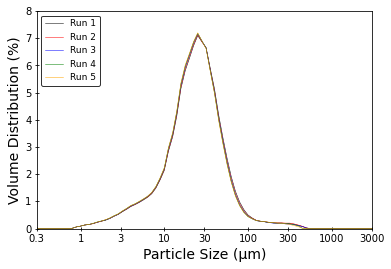

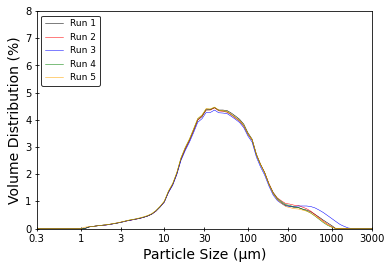

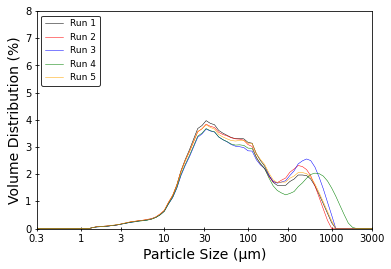

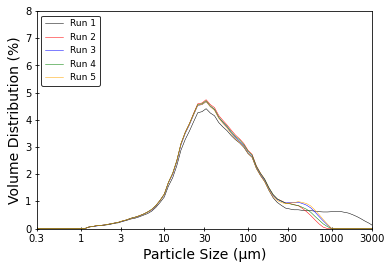

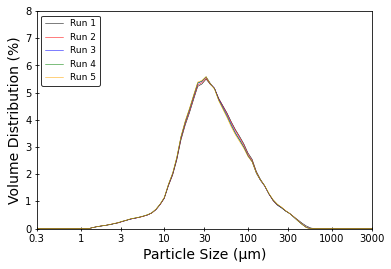

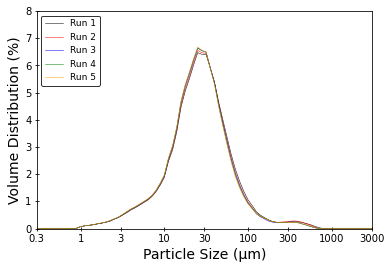

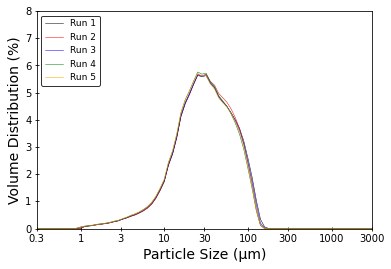

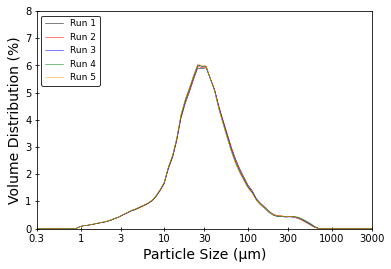

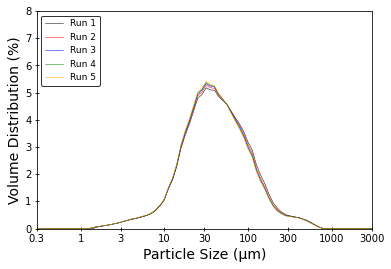

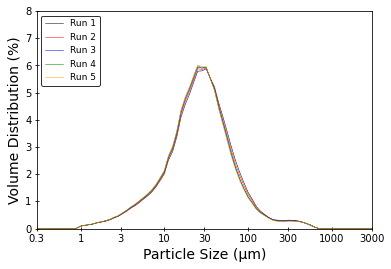

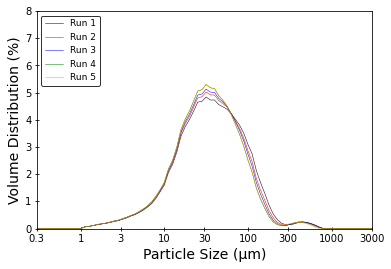

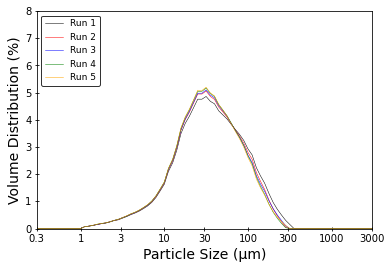

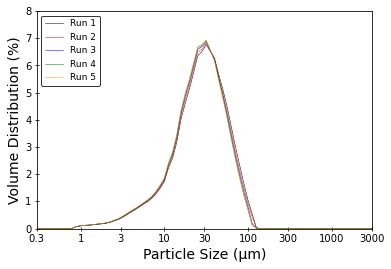

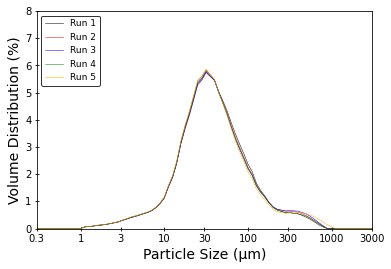

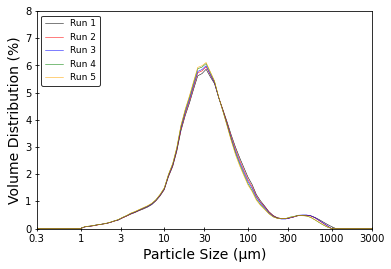

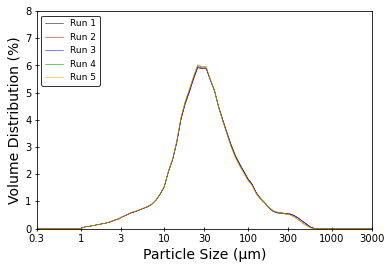

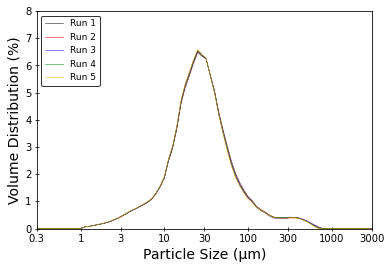

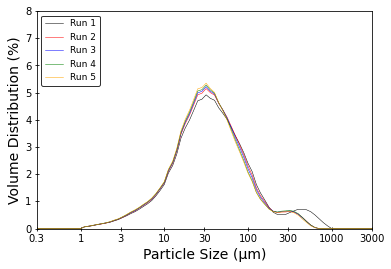

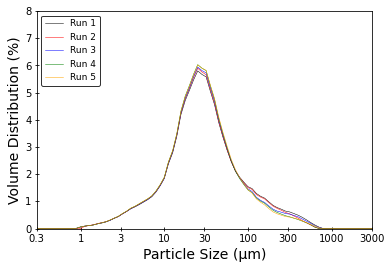

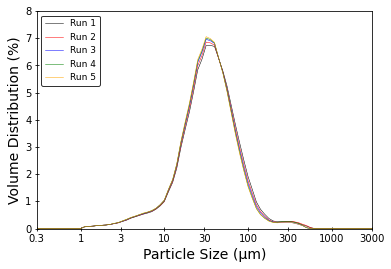

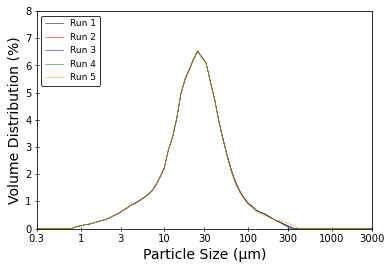

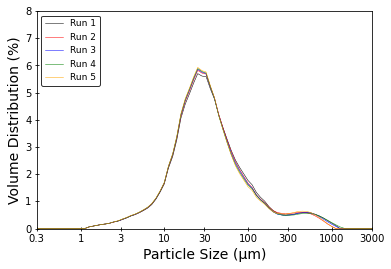

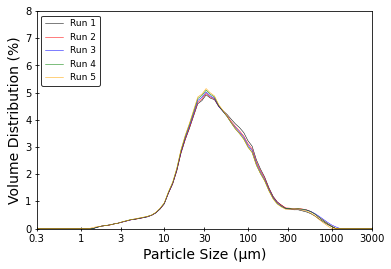

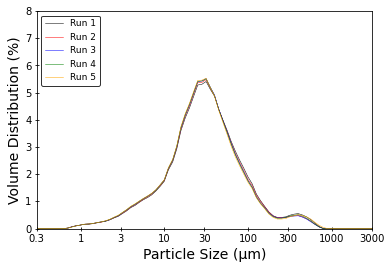

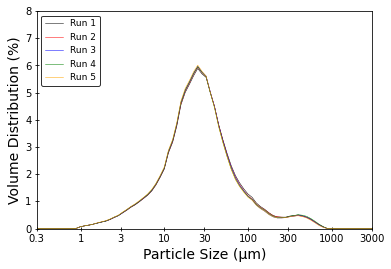

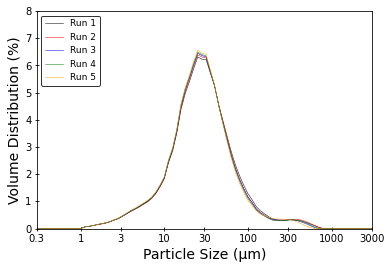

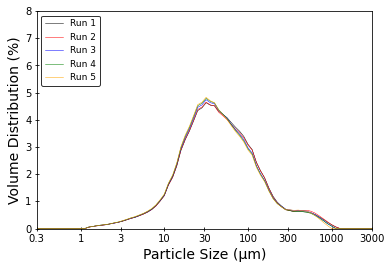

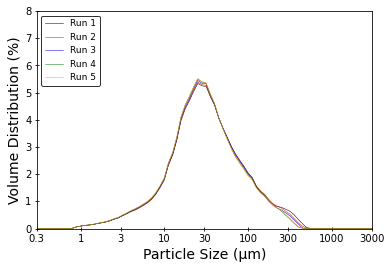

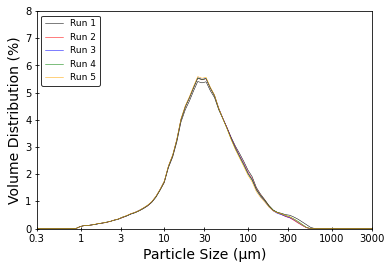

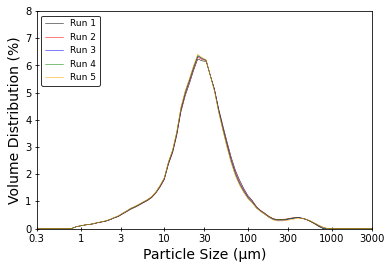

In [3]:
########################
### Step 2: Plotting ###
########################

for sn in sn_list:
    df_sub = df[[col for col in df.columns if sn in col]]
    
    i = 1
    plt.figure()
    while i<=5:
        plt.plot(size, df_sub.iloc[:,i-1], c = color_code[i], lw = 0.5, label = 'Run %s' %i)
        i += 1

    plt.xscale('log')

    plt.xlim(0.3, 3000)
    a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    plt.xticks(ticks = a, labels = a)
    plt.minorticks_off()
    plt.xlabel('Particle Size (µm)', size = 14)
    
    plt.ylim(0, 8)
    plt.yticks(np.arange(0, 8.1, step=1))
    plt.ylabel('Volume Distribution (%)', size = 14)
        
    plt.legend(loc = 2, frameon = True, edgecolor = 'black', fontsize = 9)
    plt.tick_params(axis = 'both', direction = 'inout')
    
    plt.savefig(sn + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')
    

End of Code